# Flood Frequency Analysis with Pandas

## Lejo Flores

In [1]:
import dataretrieval.nwis as nwis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

usgs_site = '13246000'
start_date = '1970-10-01'
end_date = '2020-09-30'

In [2]:
df_flow = nwis.get_record(sites=usgs_site, service='dv', 
                          start=start_date, end=end_date)
df_flow

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,
1970-10-01 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1710.0,A
1970-10-02 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1710.0,A
1970-10-03 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1700.0,A
1970-10-04 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1690.0,A
1970-10-05 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,1680.0,A
...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,942.0,A
2020-09-27 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,859.0,A
2020-09-28 00:00:00+00:00,NaN,NaN,13246000,NaN,NaN,821.0,A


In [3]:
q_ams = df_flow['00060_Mean'].groupby(df_flow.index.year).max().values
q_ams

array([1710., 7990., 3980., 2980., 7520., 3900., 2790., 3230., 3750.,
       2470., 4950., 5940., 5550., 4080., 5350., 3280., 4900., 2020.,
       2020., 3310., 3040., 2040., 1690., 6100., 2120., 4880., 6190.,
       4920., 5630., 4770., 3310., 1560., 2170., 4290., 3650., 3220.,
       5730., 2140., 4420., 5320., 7410., 4770., 5030., 2500., 3720.,
       2080., 3790., 6090., 4190., 5560., 5330.])

In [11]:
q_ams_sorted = np.sort(q_ams)
q_ams_sorted

array([1560., 1690., 1710., 2020., 2020., 2040., 2080., 2120., 2140.,
       2170., 2470., 2500., 2790., 2980., 3040., 3220., 3230., 3280.,
       3310., 3310., 3650., 3720., 3750., 3790., 3900., 3980., 4080.,
       4190., 4290., 4420., 4770., 4770., 4880., 4900., 4920., 4950.,
       5030., 5320., 5330., 5350., 5550., 5560., 5630., 5730., 5940.,
       6090., 6100., 6190., 7410., 7520., 7990.])

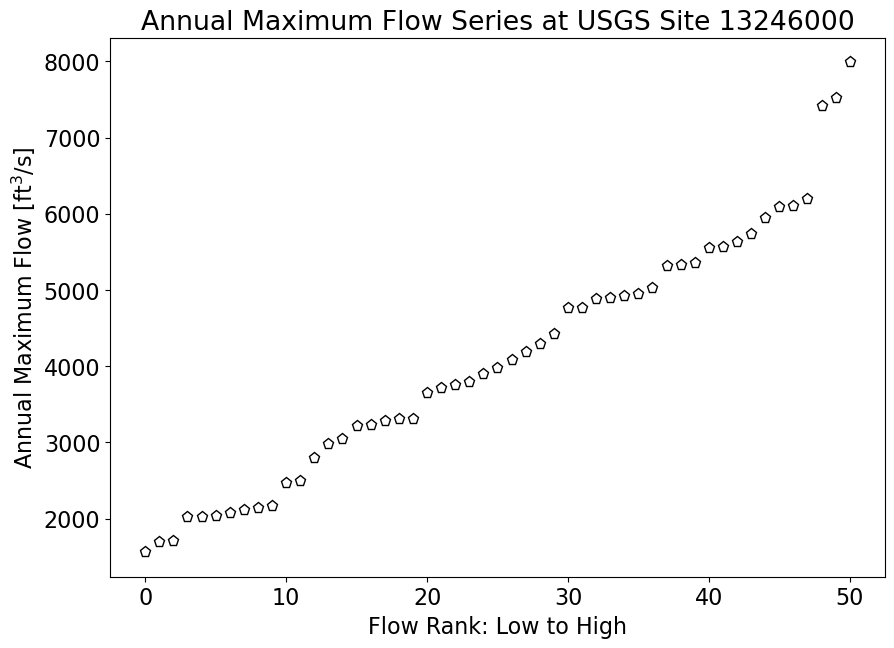

In [42]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 16})
plt.plot(q_ams_sorted, linestyle='none', marker='p', markerfacecolor='none', 
         markeredgecolor='k', markersize=8)
plt.xlabel('Flow Rank: Low to High')
plt.ylabel('Annual Maximum Flow [ft${}^3$/s]')
plt.title('Annual Maximum Flow Series at USGS Site '+usgs_site)
plt.savefig('AnnualMaxFlow.png', dpi=300)